Import and Install Dependencies

In [ ]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [9]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

Keypoints using MP Holistic

In [10]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [11]:
# COLOR CONVERSION BGR 2 RGB
# Make prediction and make COLOR COVERSION RGB 2 BGR

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [12]:
### to see the different connections: mp_holistic.POSE_CONNECTIONS

In [13]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [14]:
def draw_styled_landmarks(image, results):
    # Draw face 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [51]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

      
        ret, frame = cap.read()

    
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
    
        draw_styled_landmarks(image, results)

      
        cv2.imshow('OpenCV Feed', image)

        # Break 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [17]:
### Not assigned yet len(results.left_hand_landmarks.landmark)

In [18]:
results

mediapipe.python.solution_base.SolutionOutputs

In [19]:
draw_landmarks(frame, results)

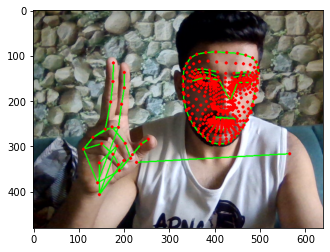

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extract Keypoint Values

In [20]:
# Extracting from all 4 Connection models (pose,face,lh,rh)

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [22]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.54480201,  0.34120569, -1.47771525, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
# to show all the different connections for 3 variables we are modeling x y z and visibility(+33)
468*3+33*4+21*3+21*3



1662

In [15]:
np.save('0', result_test)

In [16]:
np.load('0.npy')

array([ 0.45323974,  0.53032845, -1.93646622, ...,  0.14627066,
        0.60741025, -0.07765903])

Setup Folders for Collection

In [52]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('FinalExamVideoAlert_Data5') 

# Actions that we try to detect
actions = np.array(['Writing Notes/Reading Screen', 'Hand Raised', 'Hand Covering Face'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [53]:
#looking at screen
## 0
## 1
## 2
## Hand covering face 
##...
## 29
# Writing notes


In [54]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collect Keypoint Values for Training and Testing

In [55]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [168]:
cap.release()
cv2.destroyAllWindows()

Preprocess Data and Create Labels 

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'Writing Notes/Reading Screen': 0, 'Hand Raised': 1, 'Hand Covering Face': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'FinalExamVideoAlert_Data4\\Writing Notes/Reading Screen\\0\\0.npy'

In [34]:
np.array(sequences).shape

(0,)

In [35]:
np.array(labels).shape

(0,)

In [175]:
X = np.array(sequences)

In [176]:
X.shape

(90, 30, 1662)

In [177]:
y = to_categorical(labels).astype(int)

In [178]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [180]:
y_test.shape

(9, 3)

Now Building and Training LSTM Neural Network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
res = [.7, 0.2, 0.1]

In [40]:
actions[np.argmax(res)]

'Writing Notes/Reading Screen'

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [187]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 936ms/step - loss: 5.3395 - categorical_accuracy: 0.4225
Epoch 2/2000
3/3 [==============================] - 0s 112ms/step - loss: 7.7697 - categorical_accuracy: 0.3369
Epoch 3/2000
3/3 [==============================] - 0s 97ms/step - loss: 9.2485 - categorical_accuracy: 0.4667
Epoch 4/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.0889 - categorical_accuracy: 0.3229
Epoch 5/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.9389 - categorical_accuracy: 0.4449
Epoch 6/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.5734 - categorical_accuracy: 0.3886
Epoch 7/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.6850 - categorical_accuracy: 0.6917
Epoch 8/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.6590 - categorical_accuracy: 0.6442
Epoch 9/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.6175 - categorical_accuracy: 0.6995

3/3 [==============================] - 0s 79ms/step - loss: 334.9702 - categorical_accuracy: 0.3324
Epoch 75/2000
3/3 [==============================] - 0s 81ms/step - loss: 70.0775 - categorical_accuracy: 0.3661
Epoch 76/2000
3/3 [==============================] - 0s 86ms/step - loss: 9.1111 - categorical_accuracy: 0.4253
Epoch 77/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.6015 - categorical_accuracy: 0.2657
Epoch 78/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.4901 - categorical_accuracy: 0.3951
Epoch 79/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.2971 - categorical_accuracy: 0.3001
Epoch 80/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.5190 - categorical_accuracy: 0.4471
Epoch 81/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.9995 - categorical_accuracy: 0.2865
Epoch 82/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.3433 - categorical_accuracy: 0.3766
Epo

3/3 [==============================] - 0s 81ms/step - loss: 0.4908 - categorical_accuracy: 0.8478
Epoch 219/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.4519 - categorical_accuracy: 0.8075
Epoch 220/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4661 - categorical_accuracy: 0.8013
Epoch 221/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4429 - categorical_accuracy: 0.7197
Epoch 222/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4699 - categorical_accuracy: 0.6995
Epoch 223/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4632 - categorical_accuracy: 0.7382
Epoch 224/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4619 - categorical_accuracy: 0.8137
Epoch 225/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.4764 - categorical_accuracy: 0.7616
Epoch 226/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4662 - categorical_accuracy: 0.820

3/3 [==============================] - 0s 73ms/step - loss: 0.0315 - categorical_accuracy: 0.9759
Epoch 363/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0362 - categorical_accuracy: 0.9877
Epoch 364/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0273 - categorical_accuracy: 0.9938
Epoch 365/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0667 - categorical_accuracy: 0.9698
Epoch 366/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0433 - categorical_accuracy: 0.9821
Epoch 367/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0408 - categorical_accuracy: 0.9821
Epoch 368/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0385 - categorical_accuracy: 0.9899
Epoch 369/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0355 - categorical_accuracy: 1.0000
Epoch 370/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0317 - categorical_accuracy: 0.983

3/3 [==============================] - 0s 80ms/step - loss: 7.1545e-04 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 77ms/step - loss: 7.7283e-04 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 78ms/step - loss: 6.8371e-04 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 79ms/step - loss: 8.2545e-04 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 80ms/step - loss: 6.0804e-04 - categorical_accuracy: 1.0000
Epoch 511/2000
3/3 [==============================] - 0s 79ms/step - loss: 7.5716e-04 - categorical_accuracy: 1.0000
Epoch 512/2000
3/3 [==============================] - 0s 77ms/step - loss: 8.2675e-04 - categorical_accuracy: 1.0000
Epoch 513/2000
3/3 [==============================] - 0s 77ms/step - loss: 7.9975e-04 - categorical_accuracy: 1.0000
Epoch 514/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.04

3/3 [==============================] - 0s 81ms/step - loss: 2.1720e-04 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.4979e-04 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.4476e-04 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.8530e-04 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.8111e-04 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.8981e-04 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.7622e-04 - categorical_accuracy: 1.0000
Epoch 653/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.9879e-04 - categorical_accuracy: 1.0000
Epoch 654/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.19

3/3 [==============================] - 0s 79ms/step - loss: 1.1060e-04 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0699e-04 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.6581e-05 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 77ms/step - loss: 8.6516e-05 - categorical_accuracy: 1.0000
Epoch 790/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0228e-04 - categorical_accuracy: 1.0000
Epoch 791/2000
3/3 [==============================] - 0s 77ms/step - loss: 8.1063e-05 - categorical_accuracy: 1.0000
Epoch 792/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0020e-04 - categorical_accuracy: 1.0000
Epoch 793/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0604e-04 - categorical_accuracy: 1.0000
Epoch 794/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.28

3/3 [==============================] - 0s 81ms/step - loss: 6.3601e-05 - categorical_accuracy: 1.0000
Epoch 927/2000
3/3 [==============================] - 0s 79ms/step - loss: 5.0522e-05 - categorical_accuracy: 1.0000
Epoch 928/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.3611e-05 - categorical_accuracy: 1.0000
Epoch 929/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.8846e-05 - categorical_accuracy: 1.0000
Epoch 930/2000
3/3 [==============================] - 0s 79ms/step - loss: 5.0559e-05 - categorical_accuracy: 1.0000
Epoch 931/2000
3/3 [==============================] - 0s 79ms/step - loss: 4.8500e-05 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 81ms/step - loss: 7.5879e-05 - categorical_accuracy: 1.0000
Epoch 933/2000
3/3 [==============================] - 0s 83ms/step - loss: 6.5623e-05 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 80ms/step - loss: 6.33

3/3 [==============================] - 0s 79ms/step - loss: 3.7163e-05 - categorical_accuracy: 1.0000
Epoch 1066/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.3860e-05 - categorical_accuracy: 1.0000
Epoch 1067/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.6807e-05 - categorical_accuracy: 1.0000
Epoch 1068/2000
3/3 [==============================] - 0s 81ms/step - loss: 4.9289e-05 - categorical_accuracy: 1.0000
Epoch 1069/2000
3/3 [==============================] - 0s 79ms/step - loss: 5.3207e-05 - categorical_accuracy: 1.0000
Epoch 1070/2000
3/3 [==============================] - 0s 79ms/step - loss: 4.3042e-05 - categorical_accuracy: 1.0000
Epoch 1071/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.7782e-05 - categorical_accuracy: 1.0000
Epoch 1072/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.2866e-05 - categorical_accuracy: 1.0000
Epoch 1073/2000
3/3 [==============================] - 0s 79ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 2.9615e-05 - categorical_accuracy: 1.0000
Epoch 1204/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.4692e-05 - categorical_accuracy: 1.0000
Epoch 1205/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.5161e-05 - categorical_accuracy: 1.0000
Epoch 1206/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.2994e-05 - categorical_accuracy: 1.0000
Epoch 1207/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.5391e-05 - categorical_accuracy: 1.0000
Epoch 1208/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.5300e-05 - categorical_accuracy: 1.0000
Epoch 1209/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.6162e-05 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.6514e-05 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 79ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 2.4527e-05 - categorical_accuracy: 1.0000
Epoch 1342/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.1386e-05 - categorical_accuracy: 1.0000
Epoch 1343/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.2558e-05 - categorical_accuracy: 1.0000
Epoch 1344/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.1336e-05 - categorical_accuracy: 1.0000
Epoch 1345/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.3045e-05 - categorical_accuracy: 1.0000
Epoch 1346/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.9326e-05 - categorical_accuracy: 1.0000
Epoch 1347/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.7108e-05 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.5430e-05 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 73ms/step - loss: 1.8035e-05 - categorical_accuracy: 1.0000
Epoch 1480/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.7815e-05 - categorical_accuracy: 1.0000
Epoch 1481/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.6625e-05 - categorical_accuracy: 1.0000
Epoch 1482/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.7071e-05 - categorical_accuracy: 1.0000
Epoch 1483/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.7468e-05 - categorical_accuracy: 1.0000
Epoch 1484/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.4833e-05 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.2110e-05 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.4554e-05 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 71ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 1.4101e-05 - categorical_accuracy: 1.0000
Epoch 1618/2000
3/3 [==============================] - 0s 79ms/step - loss: 9.4270e-06 - categorical_accuracy: 1.0000
Epoch 1619/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.4279e-06 - categorical_accuracy: 1.0000
Epoch 1620/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.5035e-05 - categorical_accuracy: 1.0000
Epoch 1621/2000
3/3 [==============================] - 0s 82ms/step - loss: 9.1754e-06 - categorical_accuracy: 1.0000
Epoch 1622/2000
3/3 [==============================] - 0s 81ms/step - loss: 8.6730e-06 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.1832e-05 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 0s 80ms/step - loss: 9.8791e-06 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 80ms/step - loss: 7.0043e-06 - categorical_accuracy: 1.0000
Epoch 1756/2000
3/3 [==============================] - 0s 79ms/step - loss: 7.9095e-06 - categorical_accuracy: 1.0000
Epoch 1757/2000
3/3 [==============================] - 0s 79ms/step - loss: 8.6101e-06 - categorical_accuracy: 1.0000
Epoch 1758/2000
3/3 [==============================] - 0s 81ms/step - loss: 6.8989e-06 - categorical_accuracy: 1.0000
Epoch 1759/2000
3/3 [==============================] - 0s 82ms/step - loss: 8.5186e-06 - categorical_accuracy: 1.0000
Epoch 1760/2000
3/3 [==============================] - 0s 83ms/step - loss: 7.0725e-06 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 78ms/step - loss: 7.8557e-06 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 83ms/step - loss: 6.1510e-06 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 79ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 5.0501e-06 - categorical_accuracy: 1.0000
Epoch 1894/2000
3/3 [==============================] - 0s 79ms/step - loss: 4.7334e-06 - categorical_accuracy: 1.0000
Epoch 1895/2000
3/3 [==============================] - 0s 76ms/step - loss: 6.3491e-06 - categorical_accuracy: 1.0000
Epoch 1896/2000
3/3 [==============================] - 0s 77ms/step - loss: 6.8801e-06 - categorical_accuracy: 1.0000
Epoch 1897/2000
3/3 [==============================] - 0s 79ms/step - loss: 7.3638e-06 - categorical_accuracy: 1.0000
Epoch 1898/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.8612e-06 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 79ms/step - loss: 6.3237e-06 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 83ms/step - loss: 7.4332e-06 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 79ms/step - lo

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

Make Predictions

In [43]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [190]:
actions[np.argmax(res[4])]

'Hand Covering Face'

In [191]:
actions[np.argmax(y_test[4])]

'Hand Covering Face'

Save Weights

In [192]:
model.save('ExamMoniteringModel1.h5')

In [44]:
model.load_weights('ExamMoniteringModel1.h5')

Evaluation and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [33]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [196]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [197]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [1, 3]],

       [[6, 1],
        [0, 2]],

       [[6, 0],
        [0, 3]]], dtype=int64)

In [198]:
accuracy_score(ytrue, yhat)

0.8888888888888888

Finally Test in Real Time

In [46]:
from scipy import stats

In [47]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), (0, 255, 255), -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [48]:
plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

In [108]:
#sequence.reverse()

In [68]:
#len(sequence)

TypeError: object of type 'int' has no len()

In [51]:
#sequence.append('def')

In [34]:
#sequence.reverse()

In [109]:
#sequence[-30:]

In [58]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Covering Face
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Writing Notes/Reading Screen
<class 'mediapipe.python.sol

Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hand Raised


In [145]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [10]:
model.predict(np.expand_dims(X_test[0], axis=0))

NameError: name 'model' is not defined

In [11]:
    cap.release()